# MNIST Image Classifier
CNN Explainer: https://poloclub.github.io/cnn-explainer/


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load and Prepare the Dataset

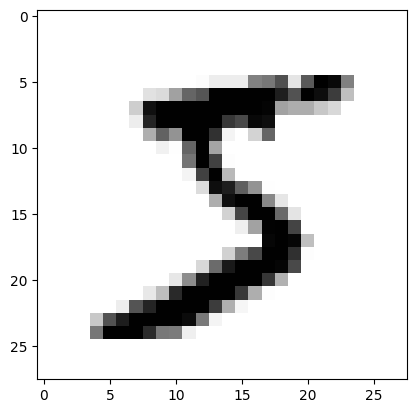

In [18]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display a sample image
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

## Build the Neural Network Model

In [19]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-dimensional vector
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the Model

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8743 - loss: 0.4330
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9644 - loss: 0.1254
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0607
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0428


## Evaluate the Model

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.0961
Test accuracy: 0.9757999777793884


## Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label: 7


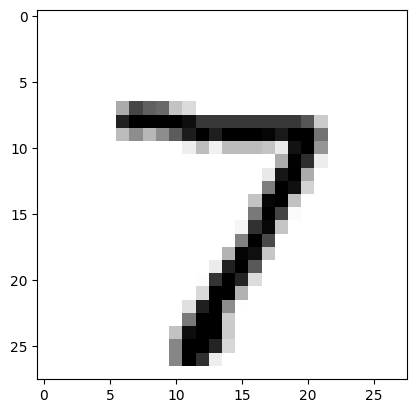

In [23]:
predictions = model.predict(test_images)

# Display a prediction for the first test image
print(f'Predicted label: {np.argmax(predictions[0])}')
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label: 2


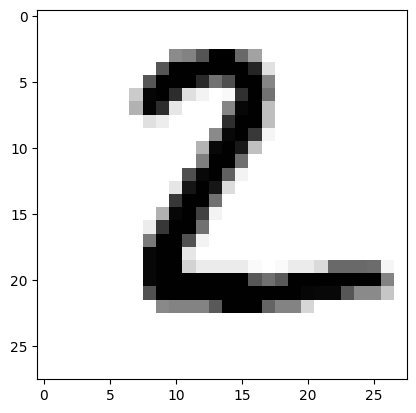

In [24]:
predictions = model.predict(test_images)

# Display a prediction for the first test image
print(f'Predicted label: {np.argmax(predictions[1])}')
plt.imshow(test_images[1], cmap=plt.cm.binary)
plt.show()

array([[2.4114436e-07, 3.0357301e-09, 4.1595420e-05, ..., 9.9973118e-01,
        5.2906626e-07, 6.0689717e-06],
       [3.8489349e-09, 1.6303900e-05, 9.9998075e-01, ..., 1.8378968e-14,
        1.8289485e-06, 1.0800519e-11],
       [1.4052316e-06, 9.9776608e-01, 1.0788484e-04, ..., 6.4237515e-04,
        1.2187024e-03, 3.0236772e-06],
       ...,
       [4.0527989e-12, 3.3124484e-10, 6.4998180e-12, ..., 1.0654702e-06,
        2.5674658e-06, 3.4662709e-05],
       [2.2178170e-07, 1.6643069e-10, 1.9292640e-10, ..., 5.9562255e-10,
        5.1545713e-04, 1.3357530e-10],
       [3.2194237e-07, 1.7615656e-10, 2.8987537e-09, ..., 3.1748545e-12,
        7.9380486e-10, 4.8908538e-10]], dtype=float32)